<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

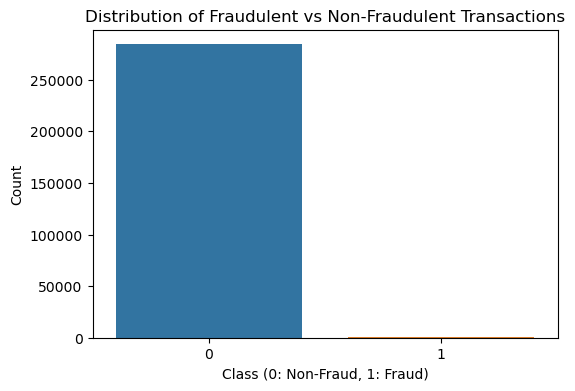

ROC-AUC Score: 0.9463


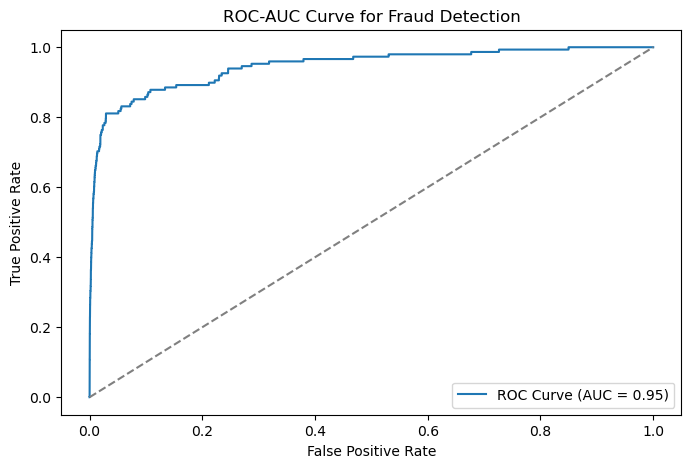

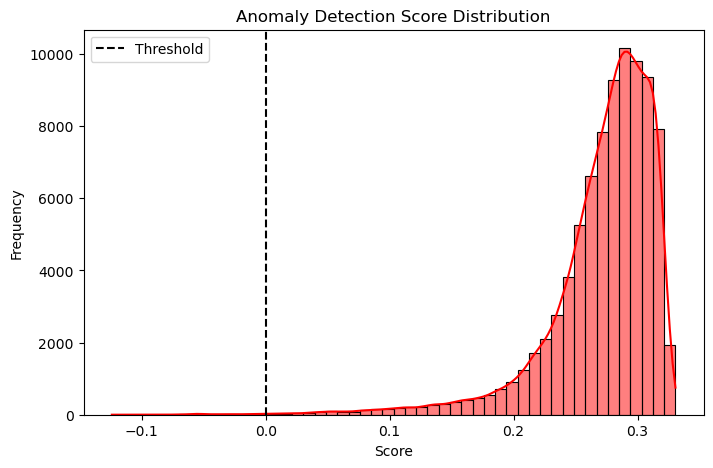

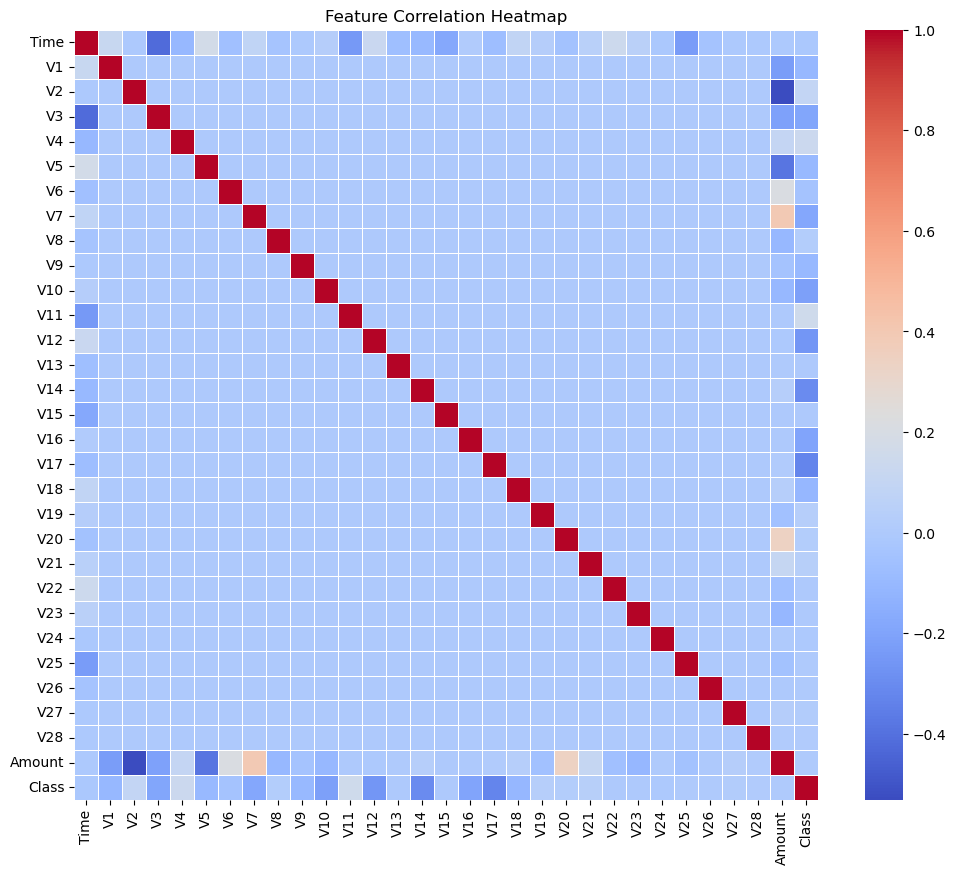

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

# Load the dataset 
data = pd.read_csv('creditcard.csv')  

# Data Exploration
print(data.info())
print(data.describe())
print(data.isnull().sum())

# Basic Visualization - Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=data)
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.show()

# Feature Selection
features = data.drop(['Time', 'Class'], axis=1)  # Dropping non-essential features for model
labels = data['Class']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42, stratify=labels)

# Anomaly Detection Model - Isolation Forest
model = IsolationForest(contamination=0.0017, random_state=42)  # Approximate fraud ratio
model.fit(X_train)

# Scoring and Prediction
y_scores = model.decision_function(X_test)
y_pred = model.predict(X_test)

# Map Isolation Forest output to standard labels
y_pred = np.where(y_pred == 1, 0, 1)  # 1 becomes 0 (non-fraud), -1 becomes 1 (fraud)

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, -y_scores)
print(f'ROC-AUC Score: {roc_auc:.4f}')

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, -y_scores)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for Fraud Detection')
plt.legend()
plt.show()

# Anomaly Detection Score Distribution
plt.figure(figsize=(8, 5))
sns.histplot(y_scores, bins=50, kde=True, color='red')
plt.axvline(x=0, color='black', linestyle='--', label='Threshold')
plt.title('Anomaly Detection Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

# Save results
data['Anomaly_Score'] = model.decision_function(features)
data['Anomaly_Label'] = np.where(model.predict(features) == 1, 0, 1)  # Label anomalies

# Export results
results = data[['Anomaly_Score', 'Anomaly_Label', 'Class']]
results.to_csv('anomaly_detection_results.csv', index=False)
